# <center> <u><font size = 24, color="#7B241C"> Logistic Regression Introduction </u> 
    

# Logistic Regression

**Logistic regression** models a relationship between predictor variables and a **categorical response variable** (a binary variable: either yes or no). Logistic regression helps us estimate a probability of falling into a certain level of the categorical response given a set of predictors. 

## Types Of Logistic Regression:

We can choose from three types of logistic regression, depending on the nature of the categorical response variable:

### Binary Logistic Regression

Used when the response is binary (i.e., it has two possible outcomes). For example, responding yes or no on a survey, and having high or low blood pressure.

### Nominal Logistic Regression

Used when there are three or more categories with **no natural ordering to the levels**. Examples of nominal responses could include departments at a business (e.g., marketing, sales, HR), type of search engine used (e.g., Google, Yahoo!, MSN), and color (black, red, blue, orange).

### Ordinal Logistic Regression

Used when there are three or more categories with **a natural ordering to the levels**, but the ranking of the levels do not necessarily mean the intervals between them are equal. Examples of ordinal responses could be how students rate the effectiveness of a college course (e.g., good, medium, poor), and medical condition (e.g., good, stable, serious, critical).

# <font color='green'> Linear Probability Model

 - When $Y$ is a binary variable (it takes 1 for success and 0 for failure), you might be tempted to model is linearly using the **indentity link function**. 
 
$$P(Y=1) = \alpha + \beta_{1}X_{i1} + \ldots + \beta_{k}X_{ik}\$$

- This model is called **linear probability model**.


- Interpreting this model is easy, for example, $\beta_{1}$ represents the change in  $P(Y=1)$ per unit change in $x_{1}$ considering all other variables constant. 


- This model is a GLM with a binomial random component with indentity link function.


- This model has major problem. We know that probabilities fall between 0 and 1. Whereas linear predictors take values over the entire real line.


- This model can predict $P(Y=1) < 0$ or $P(Y=1)>1$ for some values of the explanatory variables. 

In [1]:
from IPython.core.display import Image, HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## The Odds

### Odds Ratio

An odds ratio indicates how much more likely, with respect to odds, a certain event occurs in one group relative to its occurence in another group. 

### $$\bbox[FloralWhite, 12px, border: 4px solid blue]{Odds = \frac{P_{event}}{1- P_{event}}}$$



- Odds ratios are different than probabilities.

- Odds ratios are calculated from probabilities.
### $$\bbox[FloralWhite, 12px, border: 4px solid blue]{odds = \frac{p(X)}{1-p(X)}}$$

  
This is called the odds. 

# Probability and the Odds

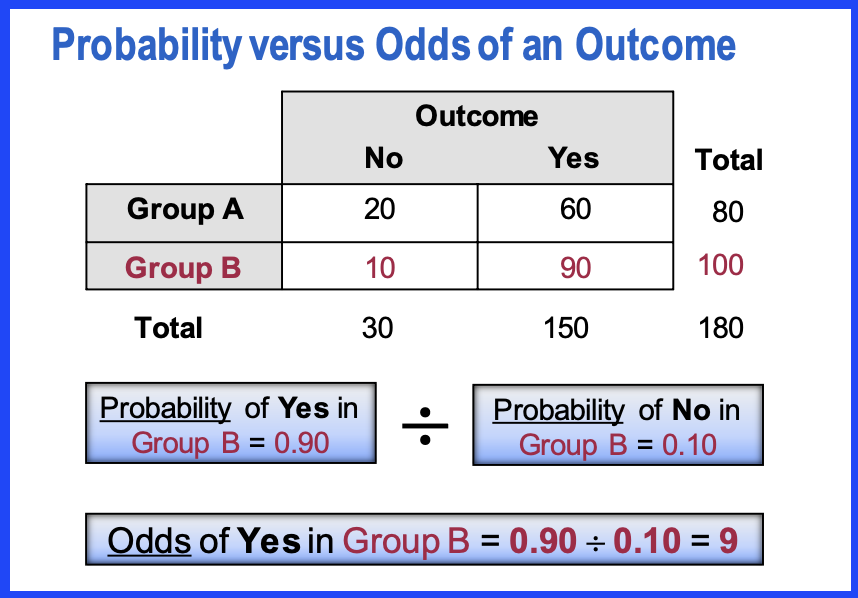

In [2]:
Image('../PobVsOdd.png', retina = True)

- There is a 90% of having outcome Yes in Group B. 

- The odds of the outcome are the ratio of the expected probability that the outcome **will** occur to the expected probability that the outcome will **not** occur.

- **The odds for Group B are 9**, which indicates that you expect **nine times** as many occurences as non-occurences in Group B. 

## Odds Ratio

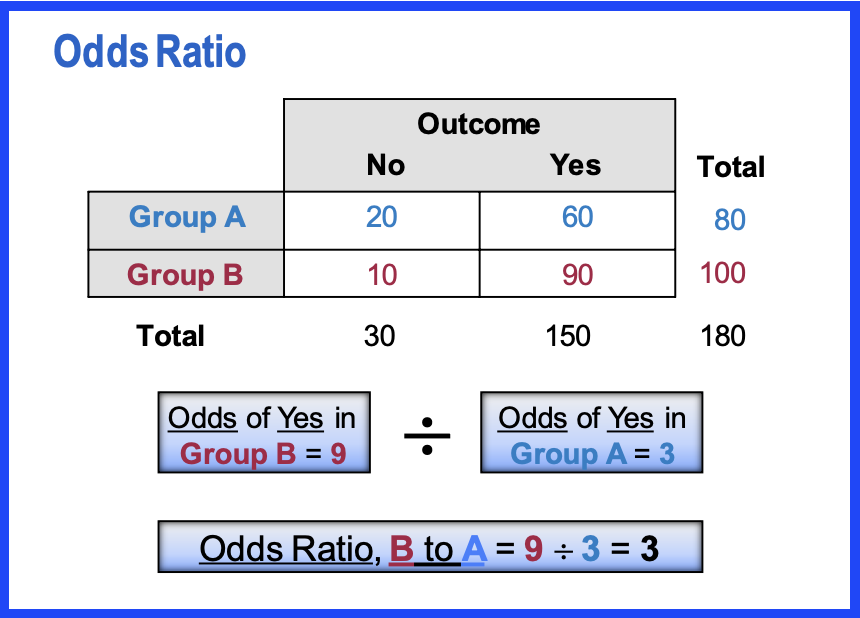

In [3]:
Image('../OddsRatio.png', retina = True)

- The odds ratio of group **B** to group A equals **3**, which indicates that the odds of getting the outcome in Group **B** are **three** times those in group **A**.

In [4]:
##--------------------------
# odds ratios in python
##=========================
import numpy as np
import statsmodels.api as sm
table = sm.stats.Table2x2(np.array([[20, 60], [10, 90]]))
table.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,3.000,,1.313,6.855,0.009
Log odds ratio,1.099,0.422,0.272,1.925,0.009
Risk ratio,2.500,,1.242,5.034,0.010
Log risk ratio,0.916,0.357,0.216,1.616,0.010


## Odds Ratio Interpretation

- The odds ratio shows the strength of the association between the predictor variable and the outcome variable. 

- If the odds is **1**: there is no association between between the predictor variable and the outcome variable. 

- If the odds is **greater than 1**: then the group **B** is more likely to have to outcome.  
- If the odds is **less than 1**: then the group **A** is more likely to have to outcome.  

Values of the odds close to 0 and $\infty$ indicate very low and very high probabilities of default, respectively. For example, on average
1 in 5 people with an odds of 1/4 will default, since p(X) = 0.2 implies an
odds of 0.2 = 1/4. Likewise, on average nine out of every ten people with 1−0.2
an odds of 9 will default, since p(X) = 0.9 implies an odds of 0.9 = 9. 1−0.9
Odds are traditionally used instead of probabilities in horse-racing, since they relate more naturally to the correct betting strategy.

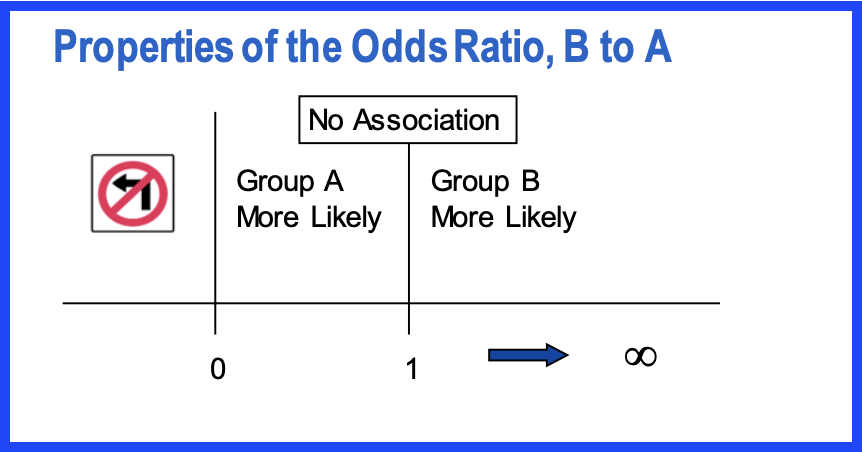

In [5]:
Image('../OddMesurement.png', retina = True)

### The Log Odds (Logit)

The log odds is the **logit** function:

$$logit (p)=\ln \left({\frac {p}{1-p}}\right)$$

$$logit (p)=\ln \left({\frac {p}{1-p}}\right)=\ln(p)-\ln(1-p)=-\ln \left({\frac {1}{p}}-1\right)\$$


- The logit function takes values between negative and positive infinity.

- The **logistic** function of any number $\alpha$  is given by the inverse-logit:

$$logit^{-1}(\alpha) = logistic(\alpha) = \frac {1}{1 + \exp (- \alpha)} = \frac {\exp (\alpha)}{\exp (\alpha) + 1}$$

## The Logit Curve

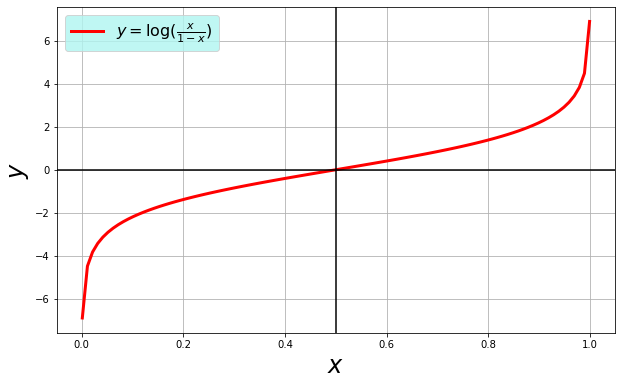

In [6]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

fig = figure(figsize=(10 ,6))
ax = fig.add_subplot(111)
ax.grid(visible = True, which='both')
x = linspace(0.001, 0.999, 100)
y = log(x / (1.0 - x))

ax.plot(x ,y, lw=3, color ="r", label=r"$y=\log(\frac{x}{1-x})$")
plt.axvline(0.5, color='k')
plt.axhline(0.0, color='k')
ax.set_ylabel(r"$y$", fontsize = 24)
ax.set_xlabel(r"$x$", fontsize = 24)
lgd = ax.legend(fontsize = 16)
lgd.get_frame().set_facecolor('#B0F5F0')
show()

___
## 

# Logistic Regression

- logistic regression models, which are a type of generalized linear model, used when the response variable is logical. Whereas linear models result in predictions that follow a straight line, logistic models result in predictions that follow a logistic curve, which is S-shaped.


- Linear regression and logistic regression are special cases of a broader type of models called generalized linear models ("GLMs"). A linear regression makes the assumption that the residuals follow a Gaussian (normal) distribution. By contrast, a logistic regression assumes that residuals follow a binomial distribution. 

# <font color='red'> Simple Logistic Regression

#### Simple Linear Regression Formula

### $$\bbox[FloralWhite, 15px, border: 4px solid blue]{OLS\ \ Rregression\ \ Model: Y_{i} = \beta_{0}+ \beta_{1}X_{1i} + \varepsilon_{i}}$$

This function is linear.

The goal of logistic model is to model the ralationship between $p(X) = Pr (Y=1|X)$

### Simple Logistic Regression Formula

$$\bbox[FloralWhite, 15px, border: 4px solid blue]{p(X) = \beta_{0} + \beta_{1}X}$$


- The drawbacks of this model are:

  1. For small values of explanatory variables, we predict negative probabilities.
  2. For large values of explanatory variables, we predict probabilities greater than 1.

In order to overcome the the issues of linear probability model, we must use a function that limits the outputs between 0 and 1 for all values of X. __Logistic Regression__ uses the __logistic__ function.

## Logistic Function

- The standard Logistic function is given by:

### $$\bbox[FloralWhite, 10px, border: 2px solid grey]{\sigma (x) = \frac{1}{1 + e^{-x}}= {\frac {e^{x}}{1 + e^{x}}}}$$

## The Logit Function (Logit Transformation)

- The inverse of the logistic function is called **Logit**:

### $$\bbox[FloralWhite, 18px, border: 2px solid grey]{logit(p_{i}) = ln \Bigg(\frac{p_{i}}{1 - p_{i}}\Bigg) = \beta_{0} + \beta_{1}X}$$

**Where**: 

  - **i**: indexes of all cases (obeservations)
  - $\mathbf{p_{i}}$: is the probability that an event occurs in the $i^{th}$ case.
  - **ln**: is the natural log (to the base e)
  
  
#### Note: 

**The logit is the natural log of the odds**
Because of this, the logit is also called the log-odds since it is equal to the logarithm of the odds ratio ${\displaystyle {\frac {p}{1-p}}}$

where p is a probability. Thus, the logit is a type of function that maps probability values from ${\displaystyle (0,1)}$ to real numbers in ${\displaystyle (-\infty ,+\infty )}$ akin to the probit function.

## The Logistic (Sigmoidal) Curve

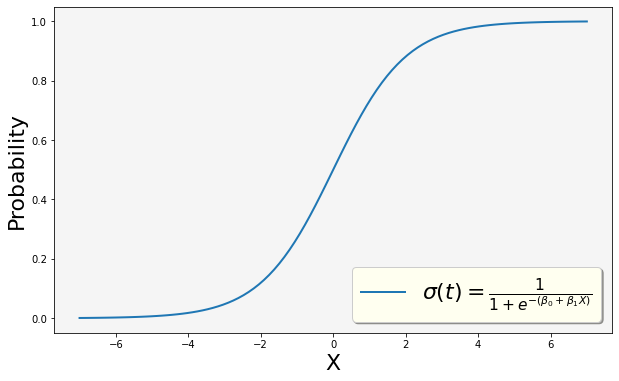

In [7]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-7, 7, 100)
sig = 1 / (1 + np.exp(-X))
plt.figure(figsize=(10, 6))
plt.rcParams['axes.facecolor']= "#F5F5F5"
plt.plot(X, sig, linewidth=2, 
         label=r"$\sigma(t) = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1}X)}}$")
plt.xlabel("X", fontsize = 22)
plt.ylabel("Probability", fontsize = 22)
legend = plt.legend(loc = "lower right",fontsize=22, shadow = True)
legend.get_frame().set_facecolor('#FFFFF0')
plt.show()

## Linearity Assumption in Logistic Regression

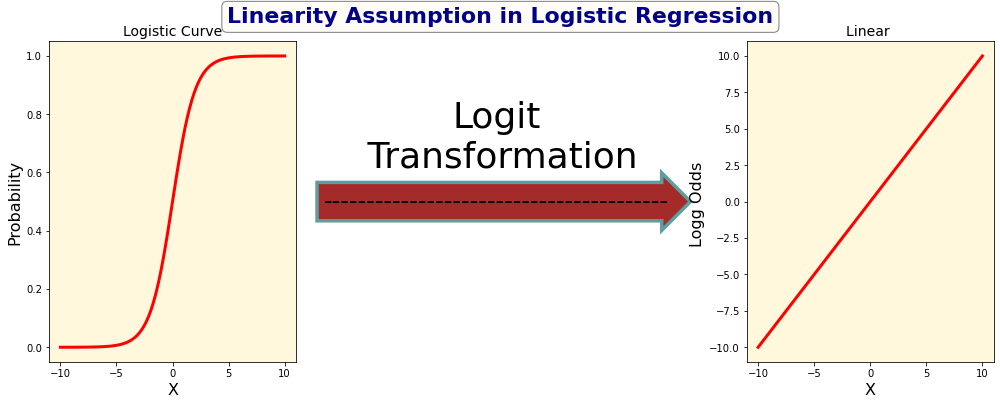

In [8]:
X = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-X))

logit = np.log(sig/(1-sig))

plt.rcParams['axes.facecolor']= "#FFF8DC"

fig = plt.figure(figsize=(14, 6))
st = fig.suptitle("Linearity Assumption in Logistic Regression", 
                  fontsize=22,
                  fontweight = "bold",
                 color = "#00008B")
st.set_bbox(dict(facecolor='#FFFAF0', alpha=0.5, 
                boxstyle="round, pad=0.25"))

ax1 = fig.add_subplot(131)
ax1.plot(X, sig, color = "red", linewidth=3)
ax1.set_title("Logistic Curve", fontsize = 14)
ax1.set_ylabel("Probability", fontsize = 16)
ax1.set_xlabel("X", fontsize = 16)


ax2 = fig.add_subplot(132)
ax2.axis('off')
text_box = dict(boxstyle="rarrow, pad=0.3", facecolor="#A52A2A",
                edgecolor="#5F9EA0", lw=3.5)

ax2.text(0.4, 0.5, "-"*40,  ha="center", va="center",
         size=24, bbox = text_box)

ax2.text(0.4, 0.7, "Logit\n Transformation",
         ha="center",
         va="center",
         size= 36)
ax3 = fig.add_subplot(133)
ax3.plot(X, logit, color = "red", lw = 3)
ax3.set_title("Linear ", fontsize = 14)
ax3.set_ylabel("Logg Odds ", fontsize = 16)
ax3.set_xlabel("X", fontsize = 16)

fig.tight_layout()

# shift subplots down:
st.set_y(0.93)
fig.subplots_adjust(top=0.85)

## Multiple  Logistic Regression 

 - __Binary Logistic Regression__ uses the __logistic__ function:

\begin{align*} 
\begin{split}
p(X) = &\frac{e^{\beta_{0} + \beta_{1}X}} {1 + e^{\big(\beta_{0} + \beta_{1}X\big)}} \\
     = &\frac{1} {1 + e^{- \big( \beta_{0} + \beta_{1}X \big)}}
\end{split}
\end{align*}



After some mathematical manipulaton of the previous function, we find that

$$\frac{p(X)}{1-p(X)} = e^{\beta_{0} + \beta_{1}X}$$


Applying the logarithm on both sides of this function leads to the __logit__ function:

$$log \big(\frac{p(X)}{1-p(X)}\big) = log\big( e^{\beta_{0} + \beta_{1}X} \big)$$


$$logit(p) = log \big(\frac{p(X)}{1-p(X)}\big) = {\beta_{0} + \beta_{1}X}$$

The logit function is called the logit transformation of the probability (P). Which is a linear function in X.

### Multiple Logistic Regression 


### $$\bbox[FloralWhite, 18px, border: 2px solid grey]{log \Bigg(\frac{P\big(X\big)}{1-P\big(X\big)}\Bigg)= \beta_{0} + \beta_{1}X_{1} + \dots +  \beta_{p}X_{p}} $$

Where $X = \Big(X_{1}, \dots, X_{p} \Big)$ are $\mathcal{p}$ predictors. The multiple logistic regression function can be written as:

### $$\bbox[FloralWhite, 18px, border: 2px solid grey]{p\big(X\big) = \frac {e^{\beta_{0} + \beta_{1}X_{1} + \dots +  \beta_{p}X_{p}}}{1 + e^{\beta_{0} + \beta_{1}X_{1} + \dots +  \beta_{p}X_{p}}}}$$


### Method of Estimation

 - In logistic Regression, the first two assumptions of OLS are violated; which means the errors are not normally distributed and they don't have a constant variance. Thus, OLS is not the appropriate estimation method. Thus, logistic function is fitted using __maximum likelihood__ method. More precisely, a technique like **Iteratively Reweighted Least Squares or (IRLS) for short** is used to find the optimal solution.
 
### Likelihood Function of Logistic Regression

For a sample of size n, the likelihood for a binary logistic regression is given by:

\begin{align*} 
 L(\beta;\textbf{y},\textbf{X})&=\prod_{i=1}^{n}\pi_{i}^{y_{i}}(1-\pi_{i})^{1-y_{i}}\\
                              & =\prod_{i=1}^{n}\biggl(\frac{\exp(\textbf{X}_{i}\beta)}{1+\exp(\textbf{X}_{i}\beta)}\biggr)^{y_{i}}\biggl(\frac{1}{1+\exp(\textbf{X}_{i}\beta)}\biggr)^{1-y_{i}}
\end{align*}

### The Log Likelihood

\begin{align*} 
\ell(\beta)&=\sum_{i=1}^{n}[y_{i}\log(\pi_{i})+(1-y_{i})\log(1-\pi_{i})]\\ 
           & =\sum_{i=1}^{n}[y_{i}\textbf{X}_{i}\beta-\log(1+\exp(\textbf{X}_{i}\beta))] 
\end{align*}

Maximizing the likelihood (or log likelihood) has no closed-form solution, so a technique like iteratively reweighted least squares is used to find an estimate of the regression coefficients, $\hat{\beta}$.

---
### 

# <center> <font size=36, color="#7B241C"> Practice Logistic with Python </font>

## Workspace Setup

 - Import pandas, numpy, matplot and seaborn.
 - From statsmodels API import ols, and glm functions
 - import statsmodels api

In [9]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Description:

- Churn dataset is from a European financial services company in 2006.

- There are 400 rows, each representing a customer. 

- If the customer closed all accounts during the time period, they were considered to have churned, and that column is marked with a one. 

- If they still had an open account at the end of the time period, has_churned is marked with a zero. 
 
- The two explanatory variables are the time since the customer first bought a service, and the time since they last bought a service. Respectively, they measure the length of relationship with the customer, and the recency of the customer's activity. 

[data source](https://www.rdocumentation.org/packages/bayesQR/topics/Churn)

In [10]:
churn = pd.read_csv('churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [11]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                400 non-null    int64  
 1   time_since_first_purchase  400 non-null    float64
 2   time_since_last_purchase   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## Linear Probability Model Estimation

 - First, will investigate the linear probability model graphically then arithmetically. Doing so strengthens the understanding of the concepts of both linear and logistic models. 

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

In [13]:
# Create a table
churn['has_churned'].value_counts()

0    200
1    200
Name: has_churned, dtype: int64

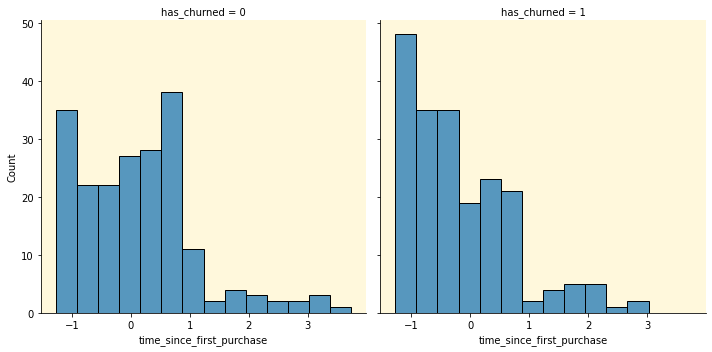

In [14]:
sns.displot(data=churn,
            x="time_since_first_purchase",
            col="has_churned")

plt.show()

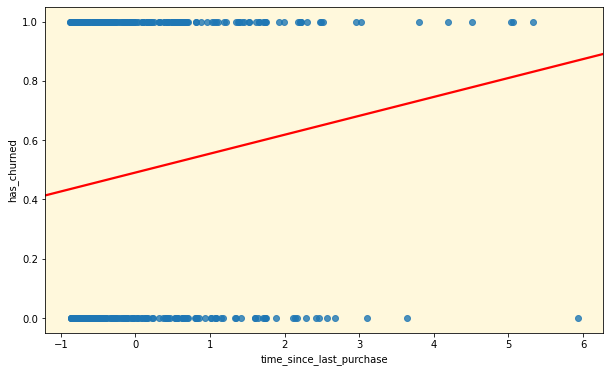

In [15]:
# Draw a linear regression trend line and a scatter plot of default Vs balance 
plt.figure(figsize = (10, 6))
sns.regplot(x = "time_since_last_purchase" , 
            y = "has_churned",
            ci = None,
            line_kws={"color": "red"},
            data = churn, truncate = False)

plt.show()

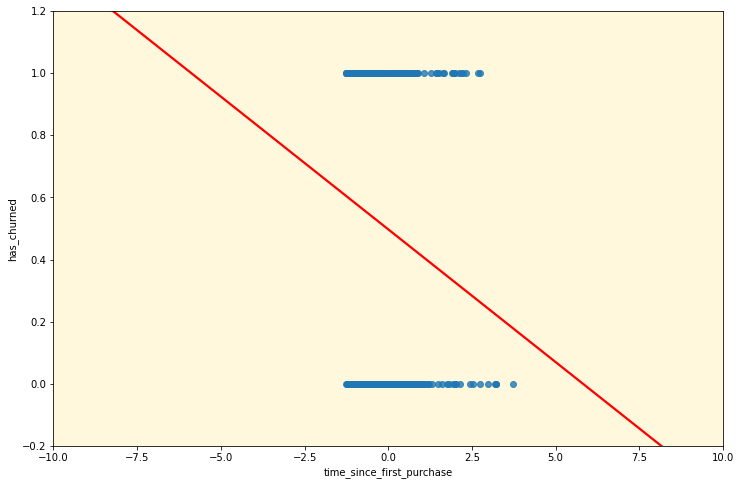

<Figure size 432x288 with 0 Axes>

In [16]:
# Draw a linear regression trend line and a scatter 
# plot of time_since_first_purchase vs. has_churned
plt.figure(figsize = (12, 8))
plt.xlim(-10, 10)
plt.ylim(-0.2, 1.2)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            truncate=False,
            line_kws={"color": "red"})

plt.show()
plt.clf()

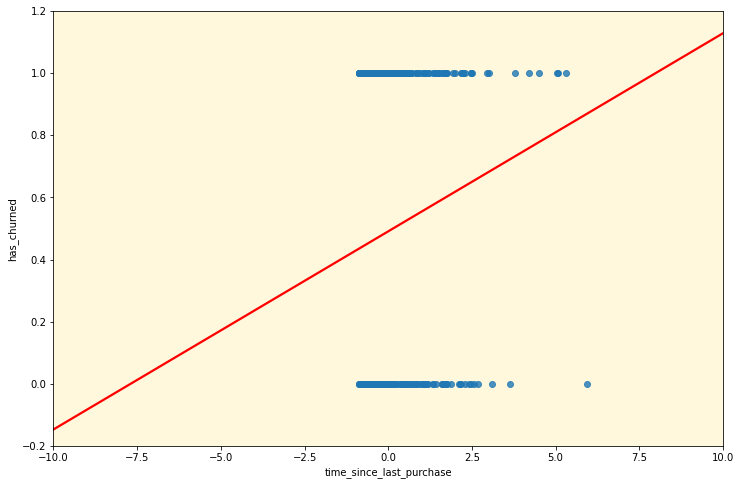

In [17]:
# Draw a linear regression trend line and a scatter 
# plot of time_since_last_purchase vs. has_churned
plt.figure(figsize = (12, 8))
plt.xlim(-10, 10)
plt.ylim(-0.2, 1.2)
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            truncate=False,
            line_kws={"color": "red"})

plt.show()

- In the previous two plots, the model predicts negative probabilities or probabilities greater than one, which are impossible cases.

**How can we overcome this problem?** ===> By looking for another model. 

## Fitting Linear Pobability Model with Statsmodels API

### 1. Fitting with Gaussian distribution (OLS)

- The firts model we are going to fit is churn against the lenght of relationship, in other words, we fit this model: `has_churned ~ time_since_first_purchase`

In [18]:
## fit the model
prob_model_ols = glm("has_churned ~ time_since_first_purchase", data = churn,
                family = sm.families.Gaussian()).fit()
print(prob_model_ols.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            has_churned   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.24460
Method:                          IRLS   Log-Likelihood:                -284.95
Date:                Sat, 25 Dec 2021   Deviance:                       97.353
Time:                        20:50:28   Pearson chi2:                     97.4
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### 2. Fitting Linear Probability Model with Binomial Distribution (Logistic)

In [19]:
prob_model_glm = glm("has_churned ~ time_since_first_purchase", data = churn,
                family = sm.families.Binomial()).fit()
print(prob_model_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            has_churned   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.87
Date:                Sat, 25 Dec 2021   Deviance:                       543.73
Time:                        20:50:28   Pearson chi2:                     400.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### Note: 

 - `statsmodels` module has a function called `logit` that can be used specifically for fitting logistic regression. See the next example

In [20]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. 
#. length of relationship using the churn dataset
model_logit = logit("has_churned ~ time_since_first_purchase",
                                  data = churn).fit()

print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            has_churned   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Dec 2021   Pseudo R-squ.:                 0.01945
Time:                        20:50:29   Log-Likelihood:                -271.87
converged:                       True   LL-Null:                       -277.26
Covariance Type:            nonrobust   LLR p-value:                  0.001022
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0152      0.102     -0.150      0.881      -0.

### Comparison between Linear and Logistic Models

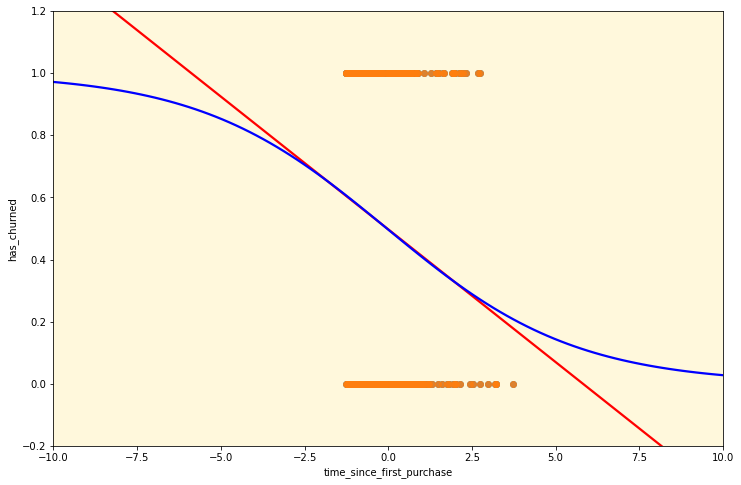

<Figure size 432x288 with 0 Axes>

In [21]:
# Draw a linear regression trend line and a scatter 
# plot of time_since_first_purchase vs. has_churned
plt.figure(figsize = (12, 8))
plt.xlim(-10, 10)
plt.ylim(-0.2, 1.2)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            truncate=False,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter 
# plot of time_since_first_purchase vs. has_churned

sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data= churn, 
            logistic=True,
           ci = None,
          truncate=False,
           line_kws={"color": "blue"})
plt.show()
plt.clf()

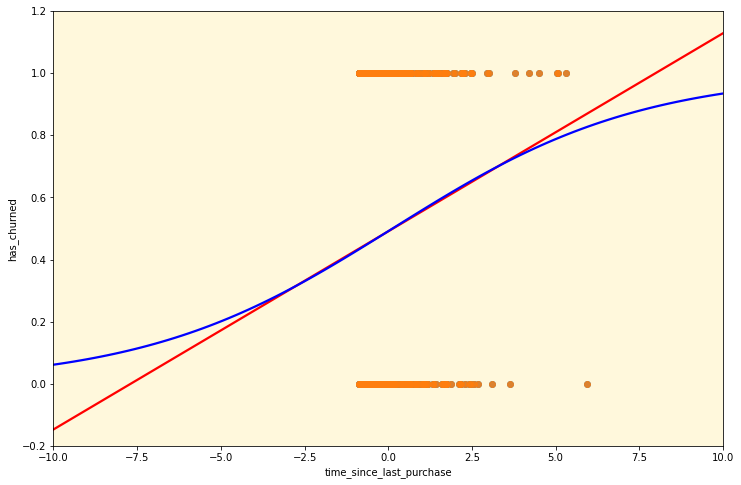

In [22]:
# Draw a linear regression trend line and a scatter 
# plot of time_since_last_purchase vs. has_churned
plt.figure(figsize = (12, 8))
plt.xlim(-10, 10)
plt.ylim(-0.2, 1.2)
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            truncate=False,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter 
# plot of time_since_last_purchase vs. has_churned

sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data= churn, 
            logistic=True,
           ci = None,
           truncate=False,
           line_kws={"color": "blue"})

plt.show()

- A logistic regression line is plotted on top of linear line to show the difference between the linear probability model and the logistic regression

- We can see that the logistic line has an S-shape. This shape is called **sigmoidal or logistic curve**.

- It's obvious that logistic regression never goes less than zero and never goes more than one, which makes it the solution to our problem.

### Fitting A Second Logistic Regression: 

- In the second example of logistic regression, we will regress the binary variable on recencey. Here is the model we are after: `has_churned ~ time_since_last_purchase`. 

- Remember, it is recommended to use `glm()` function, which is faster than `logit()` function.

In [23]:
## Create and fit the model
recency_model = glm("has_churned ~ time_since_last_purchase", 
                   data = churn,
                   family = sm.families.Binomial()).fit()

## Print the results
print(recency_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            has_churned   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.20
Date:                Sat, 25 Dec 2021   Deviance:                       546.40
Time:                        20:50:29   Pearson chi2:                     401.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Model Interpretation Results

## The Wald Test

The Wald test is the test of significance for individual regression coefficients in logistic regression (recall that we use t-tests in linear regression). For maximum likelihood estimates, the ratio: 

### \begin{equation*} 
Z=\frac{\hat{\beta}_{i}}{\textrm{s.e.}(\hat{\beta}_{i})} 
\end{equation*}

can be used to test $H_{0}: \beta_{i}= 0$.

- The standard normal curve is used to determine the `p-value` of the test. 

- cocnfidence intervals can be constructed as:

### $$\begin{equation*} 
\hat{\beta}_{i}\pm z_{1-\frac{\alpha}{2}}\tiny{\times}\normalsize \textrm{s.e.}(\hat{\beta}_{i})
\end{equation*}$$

- Estimates of the regression coefficients, $\hat\beta$, are given in the Coefficients table in the column labeled **"Coef."**.


- This table also gives coefficient p-values based on Wald tests. 


In [24]:
churn_mdl = glm("has_churned ~ time_since_first_purchase", data = churn,
                family = sm.families.Binomial()).fit()
print("-"*len("The coefficients estimates:"))
print("The coefficients estimates: ")
print("-"*len("The coefficients estimates:"))
print(churn_mdl.summary().tables[1])

---------------------------
The coefficients estimates: 
---------------------------
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0152      0.102     -0.150      0.881      -0.214       0.184
time_since_first_purchase    -0.3548      0.111     -3.198      0.001      -0.572      -0.137


### Regression Equation


### $$P(has\_churned = 1 | length\_relationship) = \frac{exp^{(-0.015  -  0.3548 length\_relationship)}}{1 + exp^{(-0.015  -0.3548 length\_relationship)}}$$

Or

### $$\frac{P(has\_churned = 1)}{1 - P(has\_churned = 1)} = exp^{-0.015  -  0.3548 length\_relationship}$$
Or

### $$\log \Bigg( \frac{P(has\_churned = 1)}{1 - P(has\_churned = 1)} \Bigg)=-0.015  -  0.3548 length\_relationship$$



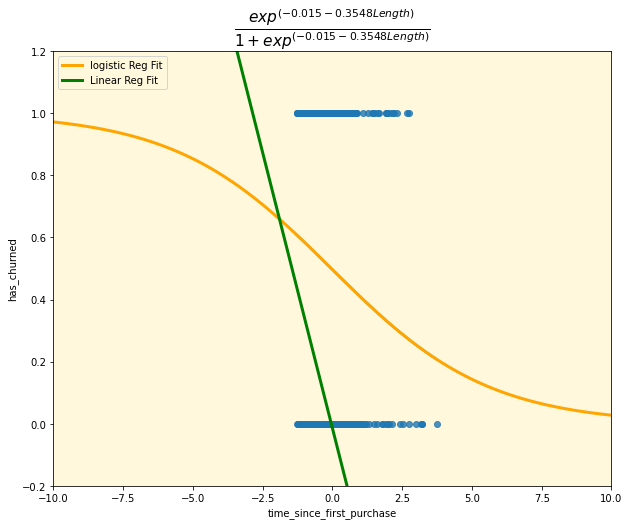

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.ylim(-0.2, 1.2)
plt.xlim(-10, 10)
sns.regplot(y='has_churned', x = 'time_since_first_purchase',
            data= churn, 
            logistic=True,
            ci = None)
sns.regplot(y='has_churned', x = 'time_since_first_purchase',
            data= churn, 
            scatter=False,
            logistic=True,
            ci = None,
           truncate = False,
           line_kws={'color': 'orange', "lw": 3},
           label = 'logistic Reg Fit')
# Adding a linear regression line to show the difference

plt.axline(xy1=(0, -0.015),
          slope = -0.3548, 
          color= 'green', lw= 3,
          label = 'Linear Reg Fit')
plt.title(r"$\frac{exp^{(-0.015 -0.3548 Length)}}{1 + exp^{(-0.015 -0.3548 Length)}}$",
         fontsize = 22)
plt.legend(loc = "upper left")
plt.show()

### Interpreting the Odds ratio

- The regression parameter estimate for `time_since_firt_purchase` is `-0.3548`.

- This value is the **log-odds**, so in order to have the odds, we need to exponentiate this number.

- The odds ratio for  `time_since_firt_purchase` is calculated as `exp(-0.3548)=0.7013`. 

- The value `0.7013` is less than `1` which is in favorite of not churning.

- The 95% confidence interval is calculated as `exp(-0.3548 ±z 0.975 ∗ 0.111)`, where `z0.975=1.960` is the 97.5th percentile from the standard normal distribution.

- The interpretation of the odds ratio is that for every increase of 1 unit in `time_since_firt_purchase`, the estimated odds of `churning` are multiplied by `0.7013`.

In [26]:
odds = np.exp(-0.3548)
print("the odds is: ", odds)

the odds is:  0.701313691921618


In [27]:
ci_lw = np.exp(-0.3548 - 1.96 * 0.111)
ci_up = np.exp(-0.3548 + 1.96 * 0.111)

print("The Confidence interval is: (" + str(ci_lw) + " , " + str(ci_up) + ")" )

The Confidence interval is: (0.5641923723012766 , 0.8717609783885714)


## Fitting Multiple Logistic Regression

  - This example takes a dataset from a study of risk factors associated with low birthweight 

In [28]:
lbw = pd.read_csv('lbw.csv')
lbw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      189 non-null    int64 
 1   low     189 non-null    int64 
 2   age     189 non-null    int64 
 3   lwt     189 non-null    int64 
 4   race    189 non-null    object
 5   smoke   189 non-null    object
 6   ptl     189 non-null    int64 
 7   ht      189 non-null    int64 
 8   ui      189 non-null    int64 
 9   ftv     189 non-null    int64 
 10  bwt     189 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 16.4+ KB


In [29]:
lbw.head()

,id,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,85,0,19,182,black,nonsmoker,0,0,1,0,2523
1,86,0,33,155,other,nonsmoker,0,0,0,3,2551
2,87,0,20,105,white,smoker,0,0,0,1,2557
3,88,0,21,108,white,smoker,0,0,1,2,2594
4,89,0,18,107,white,smoker,0,0,1,0,2600


In [30]:
## ----------------------------------------------
# Convert object variables into dummy variables
# using pd.get_dummies
# -----------------------------------------------

lbw = pd.get_dummies(lbw, columns = ['race'],
                    prefix="R")
lbw = pd.get_dummies(lbw, columns = ['smoke'],
                    prefix="S")

In [31]:
lbw.head()

,id,low,age,lwt,ptl,ht,ui,ftv,bwt,R_black,R_other,R_white,S_nonsmoker,S_smoker
0,85,0,19,182,0,0,1,0,2523,1,0,0,1,0
1,86,0,33,155,0,0,0,3,2551,0,1,0,1,0
2,87,0,20,105,0,0,0,1,2557,0,0,1,0,1
3,88,0,21,108,0,0,1,2,2594,0,0,1,0,1
4,89,0,18,107,0,0,1,0,2600,0,0,1,0,1


In [32]:
## --------------------------------------------------------------
# Fit a logistic model using all variables and print the results
## --------------------------------------------------------------

lbw_mdl = glm("low ~ age + lwt + R_black + R_other + S_smoker + ptl + ht + ui" ,
             data = lbw,
             family = sm.families.Binomial()).fit()

In [33]:
print(lbw_mdl.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    low   No. Observations:                  189
Model:                            GLM   Df Residuals:                      180
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -100.72
Date:                Sat, 25 Dec 2021   Deviance:                       201.45
Time:                        20:50:30   Pearson chi2:                     182.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4612      1.205      0.383      0.7

In [34]:
# -------------------------------
# Convert the log odds into odds 
# ------------------------------
print("-"*len("The odds are:"))
print("The odds are:")
print("-"*len("The odds are:"))
print(np.exp(lbw_mdl.params))

-------------
The odds are:
-------------
Intercept    1.586014
age          0.973264
lwt          0.984963
R_black      3.534767
R_other      2.368079
S_smoker     2.517698
ptl          1.719161
ht           6.249602
ui           2.135100
dtype: float64


In [35]:
# -------------------------------
# Convert the log odds into odds 
# ------------------------------
from scipy.special import expit
print("-"*len("The probabilities are:"))
print("The probabilities are:")
print("-"*len("The probabilities are:"))
print(expit(lbw_mdl.params))

----------------------
The probabilities are:
----------------------
Intercept    0.613304
age          0.493225
lwt          0.496212
R_black      0.779481
R_other      0.703095
S_smoker     0.715723
ptl          0.632240
ht           0.862061
ui           0.681031
dtype: float64
